In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.special import erfc
import math as mt

In [18]:
pi = np.pi
m_len = 12     #Length of binary message sequence

# This line generates a random binary message sequence m of length m_len. It uses a list comprehension to iterate m_len times, 
# and for each iteration, it randomly chooses either 0 or 1 using random.choice([0, 1]) and appends the result to the list m.
m = [random.choice([0,1]) for i in range(m_len)]
print(m)
m_odd = [m[i] for i in range(m_len)if i%2 == 0]
print(m_odd)
m_even = [m[i] for i in range(m_len) if i%2 != 0]
print(m_even)
f = 100

[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 1]


In [19]:
NRZ_odd = []
NRZ_even = []
for i in m_odd:
    if i == 1:
        for j in range(f):
            NRZ_odd.append(1)
    else:
        for j in range(f):
            NRZ_odd.append(-1)

for i in m_even:
    if i == 1:
        for j in range(f):
            NRZ_even.append(1)
    else:
        for j in range(f):
            NRZ_even.append(-1)

NRZ_odd = np.array(NRZ_odd)
NRZ_even = np.array(NRZ_even)


In [20]:
# Carrier wave
t = np.arange(0, m_len / 2, 1/f)
amp = 1
fc = 2
x1 = amp * np.sin(2 * pi * fc * t)
x2 = amp * np.cos(2 * pi * fc * t)

In [21]:
BPSK_odd = NRZ_odd * x1
BPSK_even = NRZ_even * x2

#(1j * BPSK_even) effectively shifts the even signal by a quarter of a period relative to the odd signal. 
#This results in a QPSK signal where both the in-phase and quadrature components are modulated with the binary data.
QPSK = BPSK_odd + 1j * BPSK_even

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


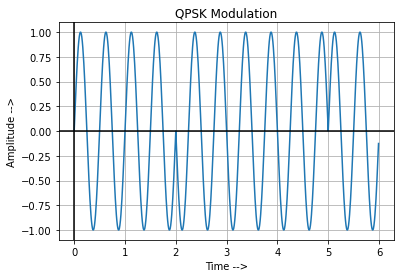

In [22]:
# plt.plot(t,QPSK)
plt.plot(t,QPSK)
plt.title('QPSK Modulation')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.grid(True)

In [24]:
#Demodulation
rec_odd = QPSK * x1
rec_even = QPSK * -1j * x2

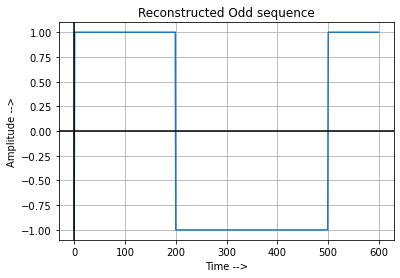

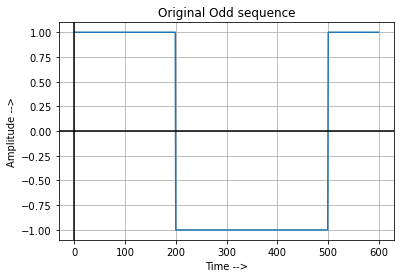

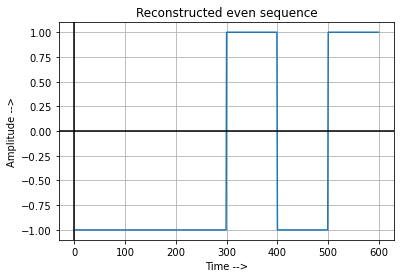

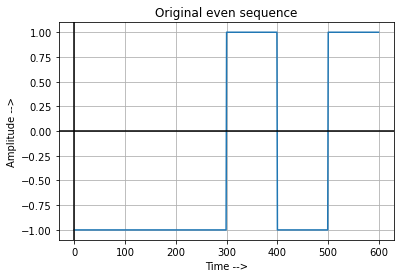

In [25]:

#The demodulated odd and even sequences (rec_odd and rec_even) are processed to detect the transmitted bits
recon_odd = []
for i in range(len(rec_odd)):
    if rec_odd[i] > 0:
        recon_odd.append(1)
    elif rec_odd[i] < 0:
        recon_odd.append(-1)
    else:
        if rec_odd[i] > rec_odd[i - 1]:
            recon_odd.append(1)
        else:
            recon_odd.append(-1)

rec_even = np.real(rec_even)
recon_even = []
for i in range(len(rec_even)):
    if rec_even[i] > 0:
        recon_even.append(1)
    elif rec_even[i] < 0:
        recon_even.append(-1)
    else:
        if rec_even[i] > rec_even[i - 1]:
            recon_even.append(1)
        else:
            recon_even.append(-1)
            
plt.plot(recon_odd)
plt.title('Reconstructed Odd sequence')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.grid(True)

plt.show()

plt.plot(NRZ_odd)
plt.title('Original Odd sequence')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.grid(True)

plt.show()

plt.plot(recon_even)
plt.title('Reconstructed even sequence')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.grid(True)

plt.show()

plt.plot(NRZ_even)
plt.title('Original even sequence')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.grid(True)

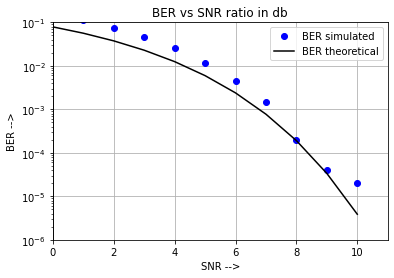

In [28]:

#simulating the Bit Error Rate (BER) for a binary transmission system in the presence of additive white Gaussian noise (AWGN) 
# across different Signal-to-Noise Ratio (SNR) levels.


SNR_db = np.arange(0,11)
N_sym = 10 ** 5   #number of symbols (bits) to be transmitted.
BER_sim = np.zeros(len(SNR_db))

# Simulation of Binary Transmission:
sym = [random.choice([1,0]) for i in range(N_sym)]
NRZ = [1 if i == 0 else -1 for i in sym]    #encodes the binary symbols into Non-Return-to-Zero (NRZ) format
NRZ_ODD = [NRZ[i] for i in range(N_sym) if i % 2 == 0]
NRZ_EVEN = [NRZ[i] for i in range(N_sym) if i % 2 != 0]

NRZ_EVEN = np.array(NRZ_EVEN)
NRZ_ODD = np.array(NRZ_ODD)

#Simulation Loop Over SNR Values:
for i, SNR in enumerate(SNR_db):
    gamma = 10 ** (SNR / 10)
    P_E = sum(abs(NRZ_EVEN ** 2)) / len(NRZ_EVEN)
    P_O = sum(abs(NRZ_ODD ** 2)) / len(NRZ_ODD) 
    N_E = P_E / gamma
    N_O = P_O / gamma
    #Gaussian noise samples are generated:
    ne = np.sqrt(N_E / 2) * np.random.standard_normal(NRZ_EVEN.shape)
    no = np.sqrt(N_O / 2) * np.random.standard_normal(NRZ_ODD.shape)

    re = NRZ_EVEN + ne
    ro = NRZ_ODD + no

    NRZ_even_det = []
    NRZ_odd_det = []
    for j in range(len(re)):
        if re[j] > 0:
            NRZ_even_det.append(1)
        else:
            NRZ_even_det.append(-1)
    
    for j in range(len(ro)):
        if ro[j] > 0:
            NRZ_odd_det.append(1)
        else:
            NRZ_odd_det.append(-1)

    BER_sim[i] = (np.sum(NRZ_ODD != NRZ_odd_det) / len(NRZ_odd_det)) + np.sum((NRZ_even_det != NRZ_EVEN) / len(NRZ_even_det))

BER_theo = 0.5 * erfc(np.sqrt ( 10 ** (SNR_db / 10)))

plt.plot(SNR_db, BER_sim, 'bo', label = 'BER simulated' )
plt.plot(SNR_db, BER_theo, 'k', label = 'BER theoretical' )
plt.title('BER vs SNR ratio in db')
plt.axis([0, 11, 1e-6, 0.1])
plt.legend()
plt.xlabel('SNR -->')
plt.ylabel('BER -->')
plt.xscale('linear')
plt.yscale('log')
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.grid(True)

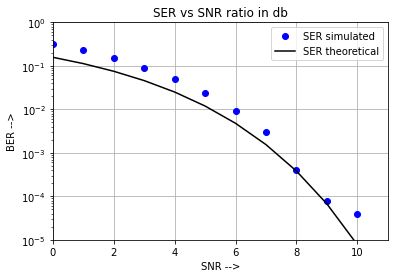

In [29]:
#calculating and plotting the Symbol Error Rate (SER)

m = mt.log2(4)    #number of bits per symbol
SER_theo = 2 * BER_theo
SER_SIm = 2 * BER_sim

plt.plot(SNR_db, SER_SIm, 'bo', label = 'SER simulated' )
plt.plot(SNR_db, SER_theo, 'k', label = 'SER theoretical' )
plt.title('SER vs SNR ratio in db')
plt.axis([0, 11, 1e-5, 1])
plt.legend()
plt.xlabel('SNR -->')
plt.ylabel('BER -->')
plt.xscale('linear')
plt.yscale('log')
plt.grid(True)

Generated Binary Sequence Plot (Figure 1): The generated binary sequence
consists of alternating 0s and 1s, with transitions occurring at specific points.
This sequence serves as the input for the QPSK modulation process.
2. In-phase Component Waveform Plot (Figure 2): The waveform for the
in-phase component in QPSK modulation exhibits periodic variations
corresponding to the transitions in the binary sequence. The amplitude of the
waveform represents the modulation level.
3. Quadrature Component Waveform Plot (Figure 3): Similar to the in-phase
component, the waveform for the quadrature component also shows periodic
variations, albeit orthogonal to the in-phase component. The amplitude and
phase of this waveform represent the modulation level and phase, respectively.
4. QPSK Modulated Signal Plot (Figure 4): The QPSK modulated signal is a
combination of the in-phase and quadrature components. It exhibits a complex
waveform with varying amplitude and phase, encoding the binary information
for transmission.

The QPSK modulation process effectively encodes binary data into a modulated
signal suitable for transmission over a communication channel.
2. The in-phase and quadrature components exhibit distinct waveforms, which,
when combined, form the QPSK modulated signal.
3. The modulated signal carries the binary information in the form of amplitude
and phase variations, enabling efficient transmission and reception.
